In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [4]:
import arabic_reshaper
from bidi.algorithm import get_display

In [5]:
from tabulate import tabulate
# Reference: https://towardsdatascience.com/pretty-displaying-tricks-for-columnar-data-in-python-2fe3b3ed9b83

In [6]:
from yellowbrick.text import FreqDistVisualizer

C:\Users\Biware\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
from sklearn.feature_selection import chi2, mutual_info_classif

In [8]:
from sklearn.decomposition import TruncatedSVD

In [9]:
from sklearn.manifold import TSNE
import umap

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

## Read data files

### metadata and raw text

In [13]:
with open('../pickle_files/doc_parsed_data.pickle', 'rb') as f:
    doc_data_df = pickle.load(f)
type(doc_data_df),doc_data_df.shape

(pandas.core.frame.DataFrame, (39, 9))

In [14]:
doc_data_df.head()

,hyperlink,filename,author,source,title_arabic,title_latin_translit,tags,section_titles,raw_text
0,http://saramusik.org/5/textei/,5.txt,يعقوب بن إسحاق الكندي,[بريطانيا العظمى],رسالة في خبر صناعة التّأليف,risāla fī ẖabar ṣināʿat al-taʾlīf,"[الموسيقى والفلسفة, المدرسة الأفلاطونيّة المتج...","[1 , تبيا, النّغم المتشابه في الكيفيّة, تمثيل ...",[بالاعتماد على تحقيق يوسف شوقي.]\n[الرّسالة من...
1,http://saramusik.org/6/textei/,6.txt,يعقوب بن إسحاق الكندي,[بريطانيا العظمى],كتاب المصوّتات الوتريّة من ذات الوتر الواحد إل...,kitāb al-muṣawwiṭāt al-watariyya min ḍāt al-wa...,"[الموسيقى والفلسفة, المدرسة الأفلاطونيّة المتج...",[لمقالة الأولى : في ذكر الآلات الصّوتيّة وسائر...,[اعتمادا على تحقيق زكريّا يوسف]\n\nأَطَالَ الَ...
2,http://saramusik.org/7/textei/,7.txt,يعقوب بن إسحاق الكندي,"[ألمانيا, تونس, ألمانيا]",رسالة في أجزاء خبريّة في الموسيقى,risāla fī aǧzāʾ ẖabariyya fī al-mūsīqā,[المدرسة الأفلاطونيّة المتجدّدة],"[مقدّمة, لمقالة الأول, لمقالة الثّاني, لمقالة ...",أنار إليه من خفيّات الأمور بموضحات الرّسوم أفض...
3,http://saramusik.org/9/textei/,9.txt,يعقوب بن إسحاق الكندي,"[ألمانيا, تركيا, ألمانيا]",رسالة الكندي في اللّحون والنّغم,Risālat al-kindī fī al-luhūn wa al-naġam,[المدرسة الأفلاطونيّة المتجدّدة],"[مقدّمة, لفنّ الأوّل : [في تركيب العود وقسمة ا...",بِسْمِ اللَّهِ الرَّحْمَانِ الرَّحِيمِ\nوَمَا ...
4,http://saramusik.org/10/textei/,10.txt,صفي الدّين عبد المؤمن أبو يوسف بن فخر الأرموي,"[تونس, تونس, نمسا, سعوديّة, مصر, مصر, مصر, مصر...",كتاب الأدوار,Kitāb al-Adwār,"[نظريّات موسيقيّة, المدرسة الأرمويّة]","[مقدّمة, ِي تَعْرِيفِ النَّغَمِ وَبَيَانِ الحِ...",الدَّسَاتِينُ هِيَ عَلَامَاتٌ تُوضَعُ عَلَى سَ...


In [15]:
doc_data_df.iloc[0,:]

hyperlink                                  http://saramusik.org/5/textei/
filename                                                            5.txt
author                                              يعقوب بن إسحاق الكندي
source                                                  [بريطانيا العظمى]
title_arabic                                  رسالة في خبر صناعة التّأليف
title_latin_translit                    risāla fī ẖabar ṣināʿat al-taʾlīf
tags                    [الموسيقى والفلسفة, المدرسة الأفلاطونيّة المتج...
section_titles          [1 , تبيا, النّغم المتشابه في الكيفيّة, تمثيل ...
raw_text                [بالاعتماد على تحقيق يوسف شوقي.]\n[الرّسالة من...
Name: 0, dtype: object

In [16]:
doc_data_df.title_arabic.tolist()

['رسالة في خبر صناعة التّأليف',
 'كتاب المصوّتات الوتريّة من ذات الوتر الواحد إلى ذات العشرة أوتار',
 'رسالة في أجزاء خبريّة في الموسيقى',
 'رسالة الكندي في اللّحون والنّغم',
 'كتاب الأدوار',
 'قول على اللّحون وصنعة المعازف ومخارج الحروف',
 'كتاب النّغم',
 'كتاب الشّفاء',
 'مسألة في الموسيقى',
 'كتاب عنصر الموسيقى وما افترقت عليه الفلاسفة من تركيبه ومايته',
 'كتاب إحصاء الإيقاعات',
 'القول على أجناس الّذي بالأربعة',
 'برء الأسقام، شرح القصيدة في الأنغام',
 'كتاب الامتاع والانتفاع في مسألة سماع السّماع',
 'كتاب الأمانات والاعتقادات',
 'في الموسيقى',
 'نظم شجرة الطّبوع والطّبائع',
 'رسالة في التّعريف ببعض كلمات فارسيّة وردت في تأليف شهاب الدّين العجمي في علم الموسيقى',
 'كتاب النّفس : القول في السّمع',
 'كتاب الإنعام في معرفة الأنغام',
 'رسالة الكشّاف في علم الأنغام / مقدّمة في علم الموسيقى',
 'كتاب المحاسن والمساوي',
 'كتاب في علم الموسيقى ومعرفة الانغام',
 'شرح كتاب الأدوار',
 'رسالة القيان',
 'طبقات المغنّين',
 'كتاب التّربيع والتّدوير',
 'العقد الفريد',
 'أرجوزة في الأنغام',
 'مقدّمة

In [17]:
tags_list = doc_data_df.tags.tolist()
tags_flat_list = [y for x in tags_list for y in x]
tags_distinct = sorted(list(set(tags_flat_list)))
reshaped_tags = [get_display(arabic_reshaper.reshape(x)) for x in tags_distinct]
reshaped_tags_flat_list = [get_display(arabic_reshaper.reshape(x)) for x in tags_flat_list]

In [18]:
pd.Series(tags_flat_list).value_counts()

المدرسة الأفلاطونيّة المتجدّدة    10
مدرسة الأراجيز والأنغام            7
المدرسة الفارابيّة                 7
النّصوص الأدبيّة الخبريّة          5
نظريّات موسيقيّة                   4
الموسيقى والفلسفة                  4
المدرسة المغاربيّة القديمة         3
النصوص الأندلسيّة                  3
المدرسة المغاربيّة الحديثة         2
المدرسة الأرمويّة                  2
إعادة التّحديد                     2
مدرسة سمرقند                       1
التصوّف والسماع                    1
الموسيقى والطّبّ                   1
نصوص إغريقيّة مترجمة               1
الآلات الموسيقيّة                  1
dtype: int64

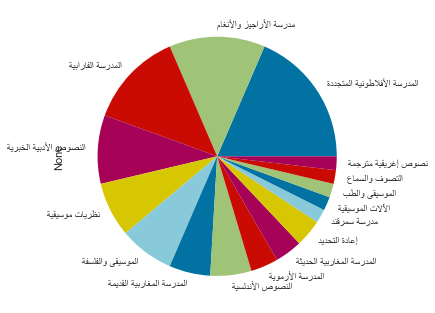

In [67]:
pd.Series(reshaped_tags_flat_list).value_counts().plot(kind='pie')
plt.savefig('../results/distribution_of_document_tags_pie_chart.png')

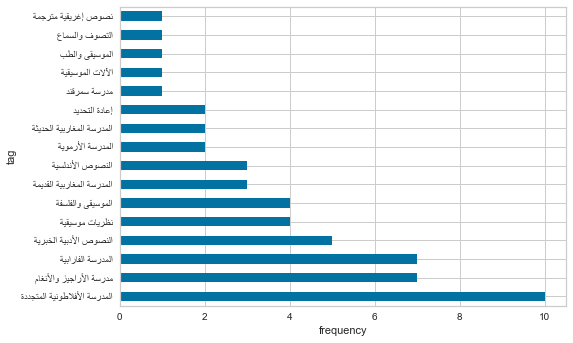

In [68]:
pd.Series(reshaped_tags_flat_list).value_counts().plot(kind='barh')
plt.xlabel('frequency')
plt.ylabel('tag')
plt.savefig('../results/distribution_of_document_tags_bar_plot.png')

#### Aggregation of document tags

- combine **infrequent** tags into a single tag.
- determine most important tag for each document (called primary_tag).

In [21]:
from collections import Counter
_ = [y for x in doc_data_df.tags.tolist() for y in x]
L = Counter(_).most_common()
L

[('المدرسة الأفلاطونيّة المتجدّدة', 10),
 ('المدرسة الفارابيّة', 7),
 ('مدرسة الأراجيز والأنغام', 7),
 ('النّصوص الأدبيّة الخبريّة', 5),
 ('الموسيقى والفلسفة', 4),
 ('نظريّات موسيقيّة', 4),
 ('النصوص الأندلسيّة', 3),
 ('المدرسة المغاربيّة القديمة', 3),
 ('المدرسة الأرمويّة', 2),
 ('المدرسة المغاربيّة الحديثة', 2),
 ('إعادة التّحديد', 2),
 ('نصوص إغريقيّة مترجمة', 1),
 ('الموسيقى والطّبّ', 1),
 ('مدرسة سمرقند', 1),
 ('الآلات الموسيقيّة', 1),
 ('التصوّف والسماع', 1)]

In [22]:
frequent_tags_list = [x[0] for x in L if x[1]>=5]
frequent_tags_list

['المدرسة الأفلاطونيّة المتجدّدة',
 'المدرسة الفارابيّة',
 'مدرسة الأراجيز والأنغام',
 'النّصوص الأدبيّة الخبريّة']

3/18/2020

    Other --> 'فئات مجتمعة'

    None --> 'مجهول'

In [23]:
Other_Tag_Arabic = 'فئات مجتمعة'
None_Tag_Arabic = 'مجهول'

In [24]:
doc_data_df['tags_agg'] = doc_data_df.tags.map(lambda doc_tags: list(set([tag if tag in frequent_tags_list else Other_Tag_Arabic for tag in doc_tags])) )
_ = [y for x in doc_data_df.tags_agg.tolist() for y in x]
Counter(_).most_common()

[('فئات مجتمعة', 17),
 ('المدرسة الأفلاطونيّة المتجدّدة', 10),
 ('المدرسة الفارابيّة', 7),
 ('مدرسة الأراجيز والأنغام', 7),
 ('النّصوص الأدبيّة الخبريّة', 5)]

In [25]:
def get_primary_tag(doc_tags):
    if doc_tags==[]:
        return None_Tag_Arabic
    for tag in frequent_tags_list:
        if tag in doc_tags:
            return tag
    return Other_Tag_Arabic

doc_data_df['primary_tag'] = doc_data_df.tags.map(get_primary_tag)
doc_data_df.primary_tag.value_counts()

المدرسة الأفلاطونيّة المتجدّدة    10
فئات مجتمعة                        9
المدرسة الفارابيّة                 7
مدرسة الأراجيز والأنغام            7
النّصوص الأدبيّة الخبريّة          5
مجهول                              1
Name: primary_tag, dtype: int64

In [26]:
doc_data_df[['tags','tags_agg']].head(10)

,tags,tags_agg
0,"[الموسيقى والفلسفة, المدرسة الأفلاطونيّة المتج...","[المدرسة الأفلاطونيّة المتجدّدة, فئات مجتمعة]"
1,"[الموسيقى والفلسفة, المدرسة الأفلاطونيّة المتج...","[المدرسة الأفلاطونيّة المتجدّدة, فئات مجتمعة]"
2,[المدرسة الأفلاطونيّة المتجدّدة],[المدرسة الأفلاطونيّة المتجدّدة]
3,[المدرسة الأفلاطونيّة المتجدّدة],[المدرسة الأفلاطونيّة المتجدّدة]
4,"[نظريّات موسيقيّة, المدرسة الأرمويّة]",[فئات مجتمعة]
5,"[المدرسة الفارابيّة, نصوص إغريقيّة مترجمة]","[فئات مجتمعة, المدرسة الفارابيّة]"
6,[المدرسة الأفلاطونيّة المتجدّدة],[المدرسة الأفلاطونيّة المتجدّدة]
7,[المدرسة الفارابيّة],[المدرسة الفارابيّة]
8,[المدرسة الأفلاطونيّة المتجدّدة],[المدرسة الأفلاطونيّة المتجدّدة]
9,[المدرسة الأفلاطونيّة المتجدّدة],[المدرسة الأفلاطونيّة المتجدّدة]


In [27]:
doc_data_df.tags.map(len).value_counts()

1    26
2     9
3     2
4     1
0     1
Name: tags, dtype: int64

In [28]:
doc_data_df.tags_agg.map(len).value_counts()

1    30
2     8
0     1
Name: tags_agg, dtype: int64

### corpus tokens

In [29]:
with open('../pickle_files/doc_tokenized_data.pickle', 'rb') as f:
    corpus_words = pickle.load(f)
len(corpus_words)

39

In [30]:
with open('../pickle_files/debug_reverse_word_stem_dict.pickle', 'rb') as f:
    debug_reverse_word_stem_dict = pickle.load(f)
len(debug_reverse_word_stem_dict)

11255

In [31]:
corpus_words[0][0:10]

['وقد', 'بينا', 'فضل', 'مطلق', 'مثلث', 'اول', 'دسا', 'مثن', 'خمس', 'خمس']

### document-term matrices

In [32]:
with open('../pickle_files/doc_vector_representation.pickle', 'rb') as f:
    count_bow_matrix,tfidf_bow_matrix,bow_vocab = pickle.load(f)
count_bow_matrix.shape, tfidf_bow_matrix.shape, len(bow_vocab)

((39, 1258), (39, 1258), 1258)

In [33]:
bow_vocab[0:10]

['1979',
 '1979 هرس',
 '1979 هرس شلواح',
 '2004',
 'ئتلاف',
 'ابا',
 'ابتد',
 'ابدا',
 'ابراهيم',
 'ابراهيم موصل']

In [34]:
assert tfidf_bow_matrix.shape[0]==doc_data_df.shape[0] and len(bow_vocab)==tfidf_bow_matrix.shape[1]

*******

## Dimensionality Reduction

Goal is to map the documents (represented as 1258-dimensional vectors using Bag-of-words technique) to a lower dimensional space in order to reduce noise in the vocabulary. We will do this by applying two different techniques successively:

1. Linear technique (LSA)
2. Non-linear technique (UMAP)

In [35]:
#doc_titles = [title[0:20] for title in doc_data_df.title_arabic.tolist()]
#reshaped_doc_titles = [get_display(arabic_reshaper.reshape(word)) for word in doc_titles]

#doc_tags = [tag[0:20] for tag in doc_data_df.primary_tag.tolist()]
#reshaped_doc_tags = [get_display(arabic_reshaper.reshape(word)) for word in doc_titles]

In [36]:
labels1 = [get_display(arabic_reshaper.reshape(x[0:20])) for x in doc_data_df.title_arabic.tolist()]
labels2 = [get_display(arabic_reshaper.reshape(x[0:20])) for x in doc_data_df.primary_tag.tolist()]

### Latent Semantic Analysis (LSA)

A linear dimensionality reduction technique. LSA is also known as a topic modeling technique.

**TO DO**: plot the singular values of the components instead of the explained variance

In [37]:
type(tfidf_bow_matrix),tfidf_bow_matrix.shape

(scipy.sparse.csr.csr_matrix, (39, 1258))

In [38]:
X = tfidf_bow_matrix.todense()
X.shape

(39, 1258)

In [39]:
X.min(),X.max()

(0.0, 0.7672189722896393)

In [40]:
svd = TruncatedSVD(n_components=30, n_iter=7, random_state=42)
X_lsa = svd.fit_transform(X)
X_lsa.shape

(39, 30)

In [41]:
svd.explained_variance_ratio_[0:5]

array([0.01863445, 0.09214603, 0.08599437, 0.05163415, 0.04744432])

In [42]:
print(svd.explained_variance_ratio_.sum())

0.9138496071080213


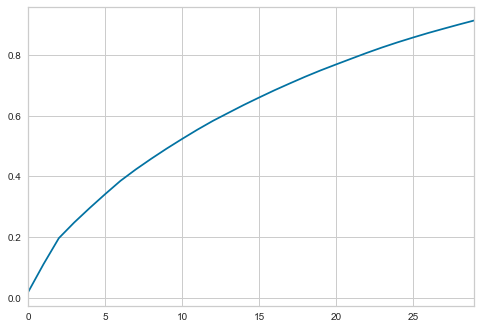

In [43]:
pd.Series(svd.explained_variance_ratio_.cumsum()).plot()

#### Plot documents in 2D space

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#>>> le.fit([1, 2, 2, 6])
#LabelEncoder()
#>>> le.classes_
#array([1, 2, 6])
#>>> le.transform([1, 1, 2, 6])

In [45]:
tag_labels = doc_data_df.primary_tag.tolist()
int_tag_labels = le.fit_transform(tag_labels)

In [46]:
Counter(zip(tag_labels,int_tag_labels))

Counter({('المدرسة الأفلاطونيّة المتجدّدة', 0): 10,
         ('فئات مجتمعة', 3): 9,
         ('المدرسة الفارابيّة', 1): 7,
         ('مدرسة الأراجيز والأنغام', 5): 7,
         ('النّصوص الأدبيّة الخبريّة', 2): 5,
         ('مجهول', 4): 1})

Each dot corresponds to a document; different colors correspond to different document tags:


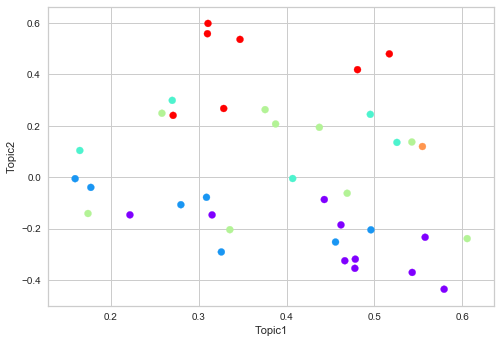

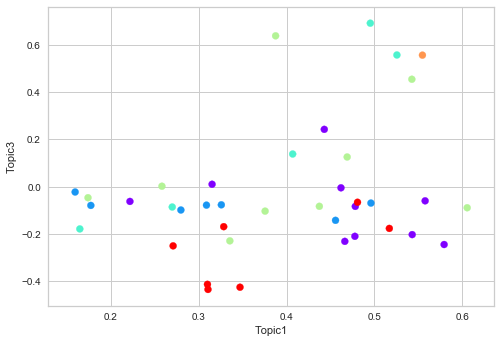

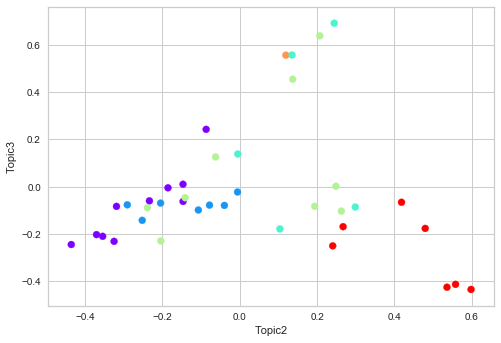

In [47]:
print('Each dot corresponds to a document; different colors correspond to different document tags:')

for i in range(0,3):
    for j in range(i+1,3):
        plt.scatter(X_lsa[:,i],X_lsa[:,j],c=int_tag_labels, cmap='rainbow')
        plt.xlabel('Topic'+str(i+1))
        plt.ylabel('Topic'+str(j+1))
        plt.show()

#### Remarks

- based on the above plot, 2 dimensions are not sufficient to separate documents of different tags.
- most likely, we need a lot more dimensions to achieve higher degree of separation.

*****

## Visualize Documents in 2D Using Non-linear Transformation

### Using t-SNE

#### Hyperparameter tuning

Wall time: 530 ms


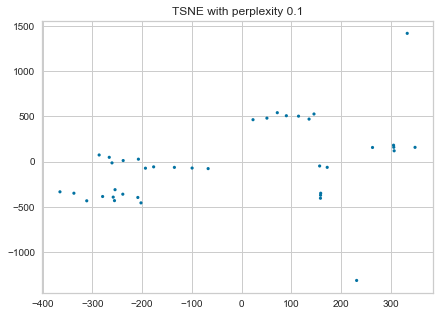

Wall time: 366 ms


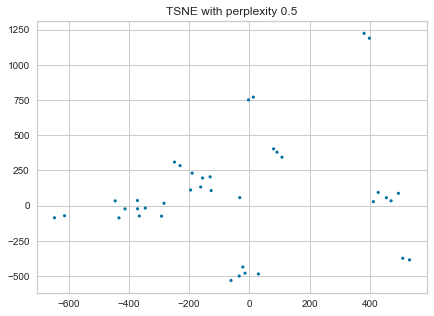

Wall time: 298 ms


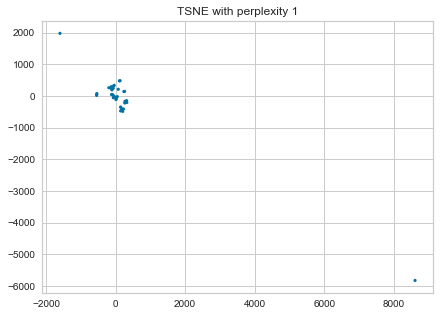

Wall time: 316 ms


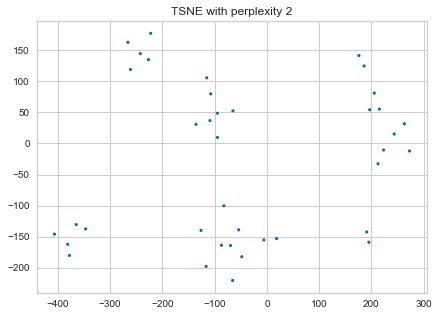

Wall time: 313 ms


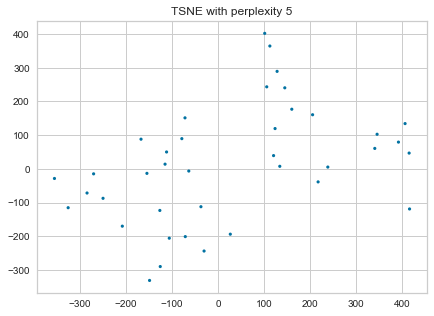

Wall time: 367 ms


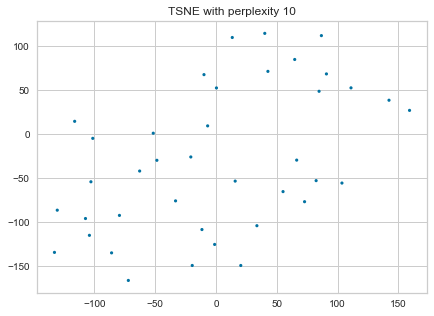

Wall time: 339 ms


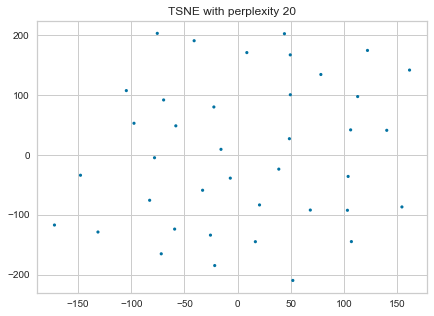

Wall time: 299 ms


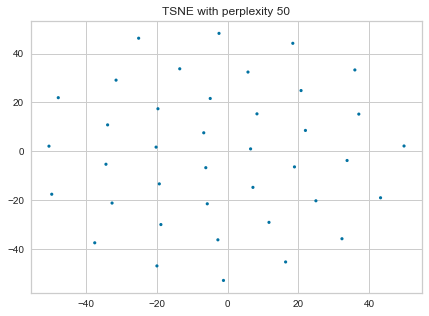

In [48]:
perplexities = [0.1,0.5,1,2,5,10,20,50]
#perplexities = [20,100]

for i,perplexity in enumerate(perplexities):
    %time doc_tsne_embedding = TSNE(n_components=2, perplexity=perplexity, random_state=123).fit_transform(X_lsa)
    plt.figure(figsize=(7,5))
    plt.scatter(doc_tsne_embedding[:,0],doc_tsne_embedding[:,1], edgecolor='none',s = 10)
    plt.title(f'TSNE with perplexity {perplexity}')
    plt.show()

#### Final transformation

In [49]:
%time doc_tsne_embedding = TSNE(n_components=2, perplexity=2, random_state=123).fit_transform(X_lsa)

Wall time: 281 ms


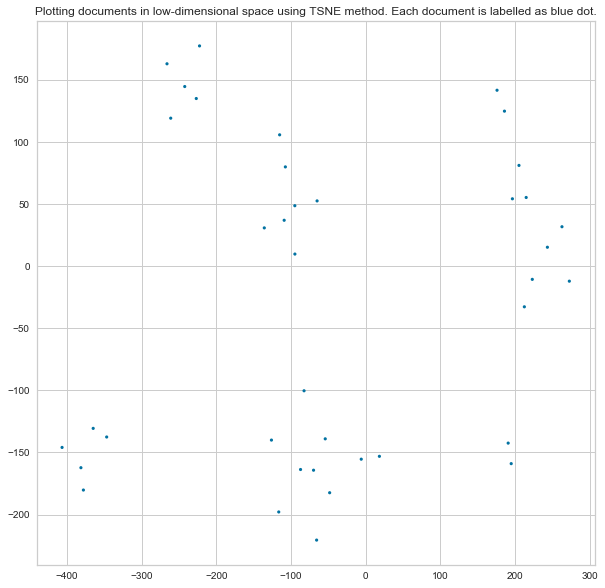

In [50]:
plt.figure(figsize=(10,10))
plt.scatter(doc_tsne_embedding[:, 0], doc_tsne_embedding[:, 1], edgecolor='none',s = 10)
plt.title(f'Plotting documents in low-dimensional space using TSNE method. Each document is labelled as blue dot.')
plt.savefig('../results/documents_tsne_dot.png')
plt.show()

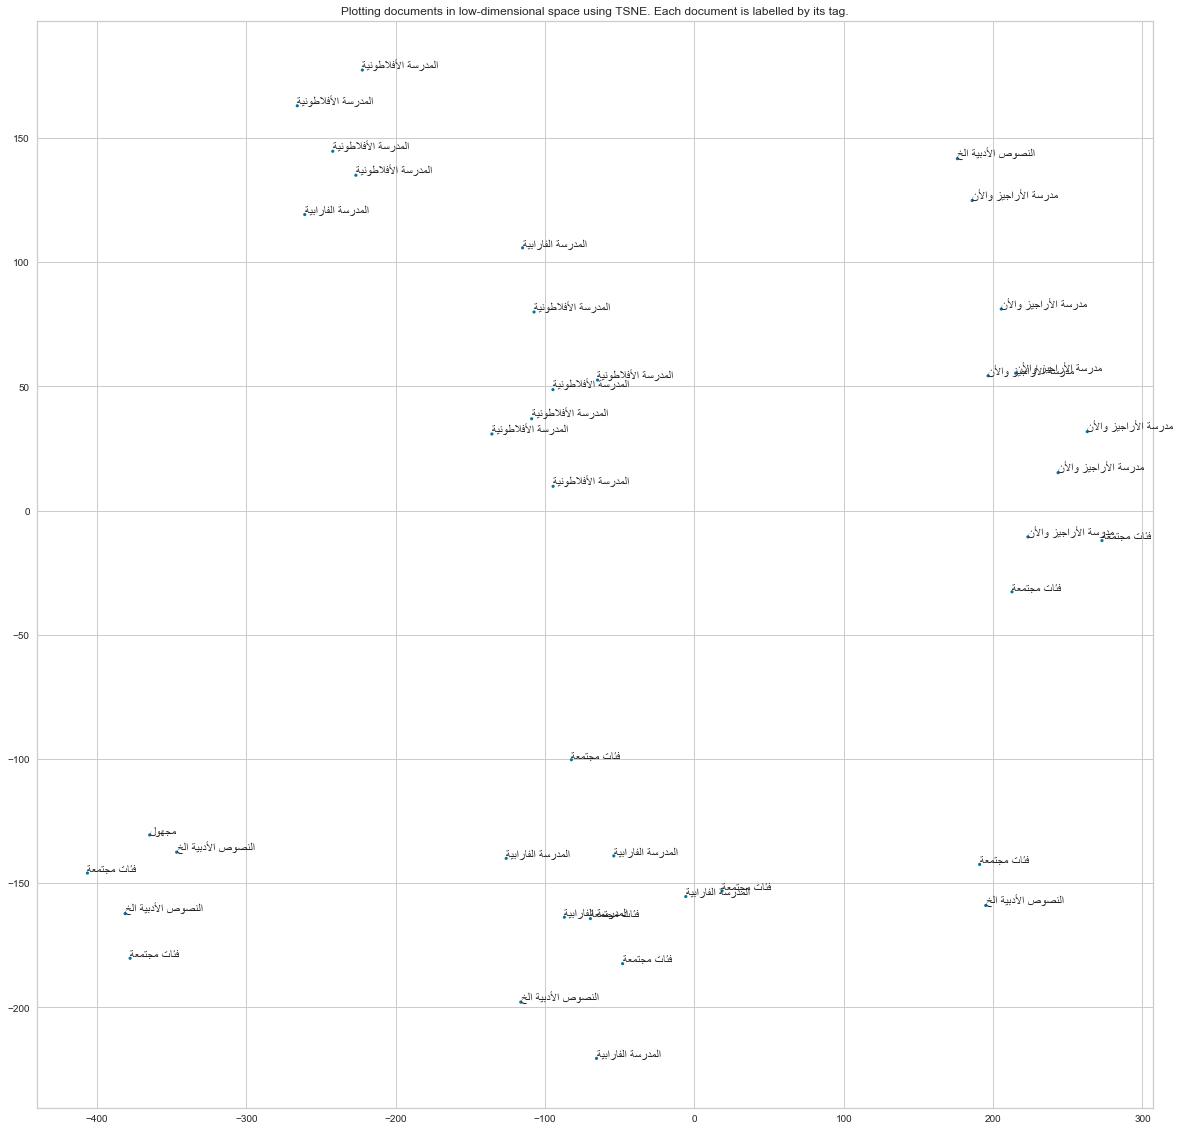

In [69]:
plt.figure(figsize=(20,20))
plt.scatter(doc_tsne_embedding[:, 0], doc_tsne_embedding[:, 1], edgecolor='none',s = 10)
for i in range(doc_tsne_embedding.shape[0]):
    plt.text(doc_tsne_embedding[i, 0], doc_tsne_embedding[i, 1],labels2[i])
plt.title(f'Plotting documents in low-dimensional space using TSNE. Each document is labelled by its tag.')
plt.savefig('../results/documents_tsne_tag.png')
plt.show()

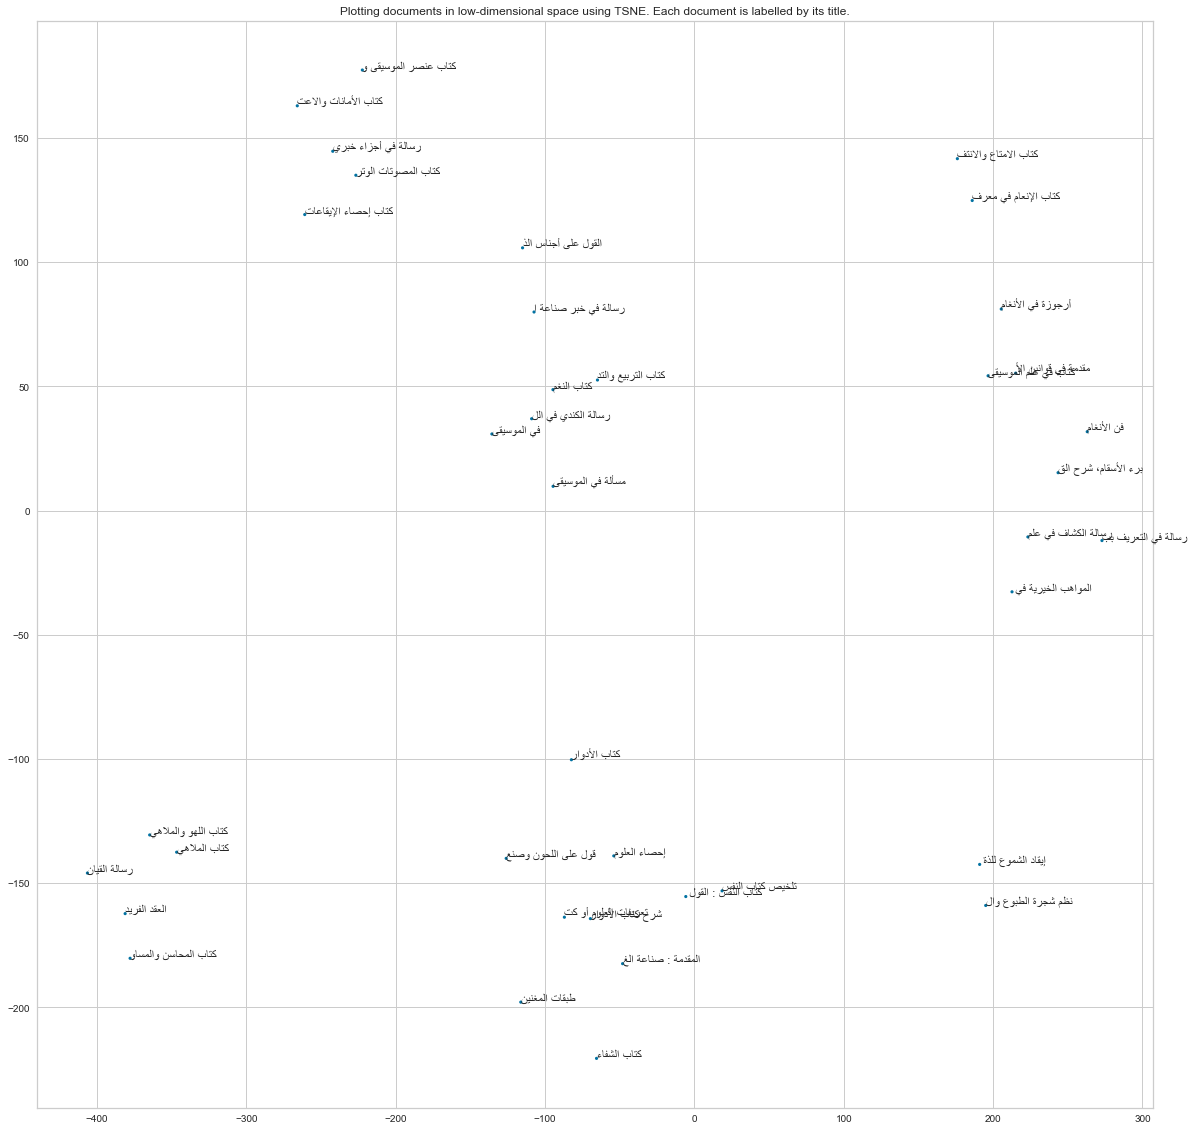

In [65]:
plt.figure(figsize=(20,20))
plt.scatter(doc_tsne_embedding[:, 0], doc_tsne_embedding[:, 1], edgecolor='none',s = 10)
for i in range(doc_tsne_embedding.shape[0]):
    plt.text(doc_tsne_embedding[i, 0], doc_tsne_embedding[i, 1],labels1[i])
plt.title(f'Plotting documents in low-dimensional space using TSNE. Each document is labelled by its title.')
plt.savefig('../results/documents_tsne_title.png')
plt.show()

### using UMAP method

#### Hyperparameter tuning

In [53]:
X_lsa.shape

(39, 30)

C:\Users\Biware\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


Wall time: 5.83 s


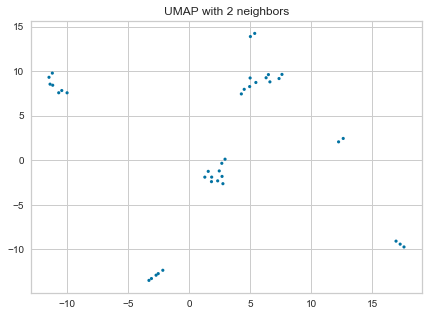

Wall time: 47 ms


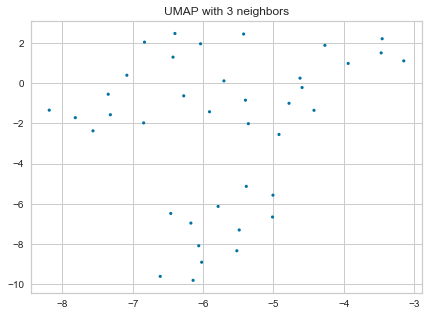

Wall time: 57 ms


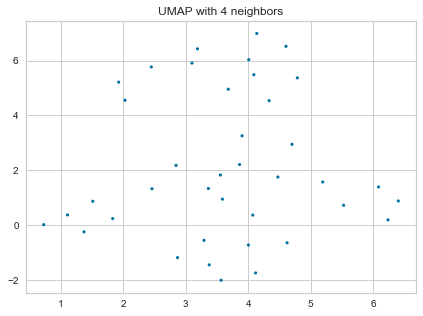

Wall time: 74 ms


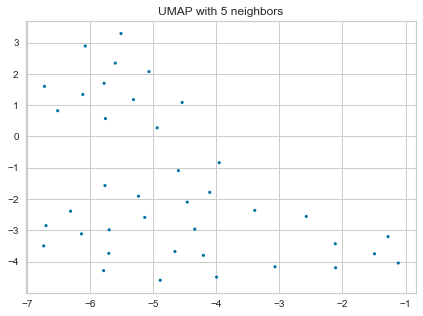

In [54]:
for n in [2,3,4,5]:
    %time embedding = umap.UMAP(n_neighbors=n, min_dist=0.5, random_state=2025).fit_transform(X_lsa)

    plt.figure(figsize=(7,5))
    plt.scatter(embedding[:, 0], embedding[:, 1], edgecolor='none',s = 10)
    plt.title(f'UMAP with {n} neighbors')
    plt.show()

#### Final transformation

In [55]:
%time doc_umap_embedding = umap.UMAP(n_neighbors=2, min_dist=0.5, random_state=123).fit_transform(X_lsa)

Wall time: 40 ms


C:\Users\Biware\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


In [56]:
doc_umap_embedding.shape

(39, 2)

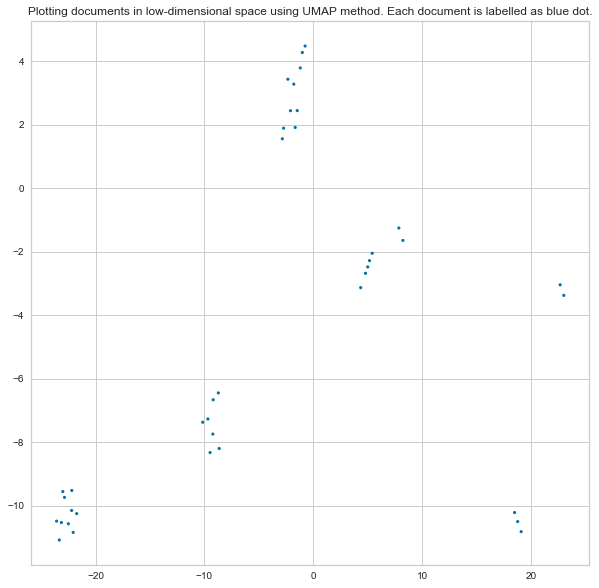

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(doc_umap_embedding[:, 0], doc_umap_embedding[:, 1], edgecolor='none',s = 10)
plt.title(f'Plotting documents in low-dimensional space using UMAP method. Each document is labelled as blue dot.')
plt.savefig('../results/documents_umap_dot.png')
plt.show()

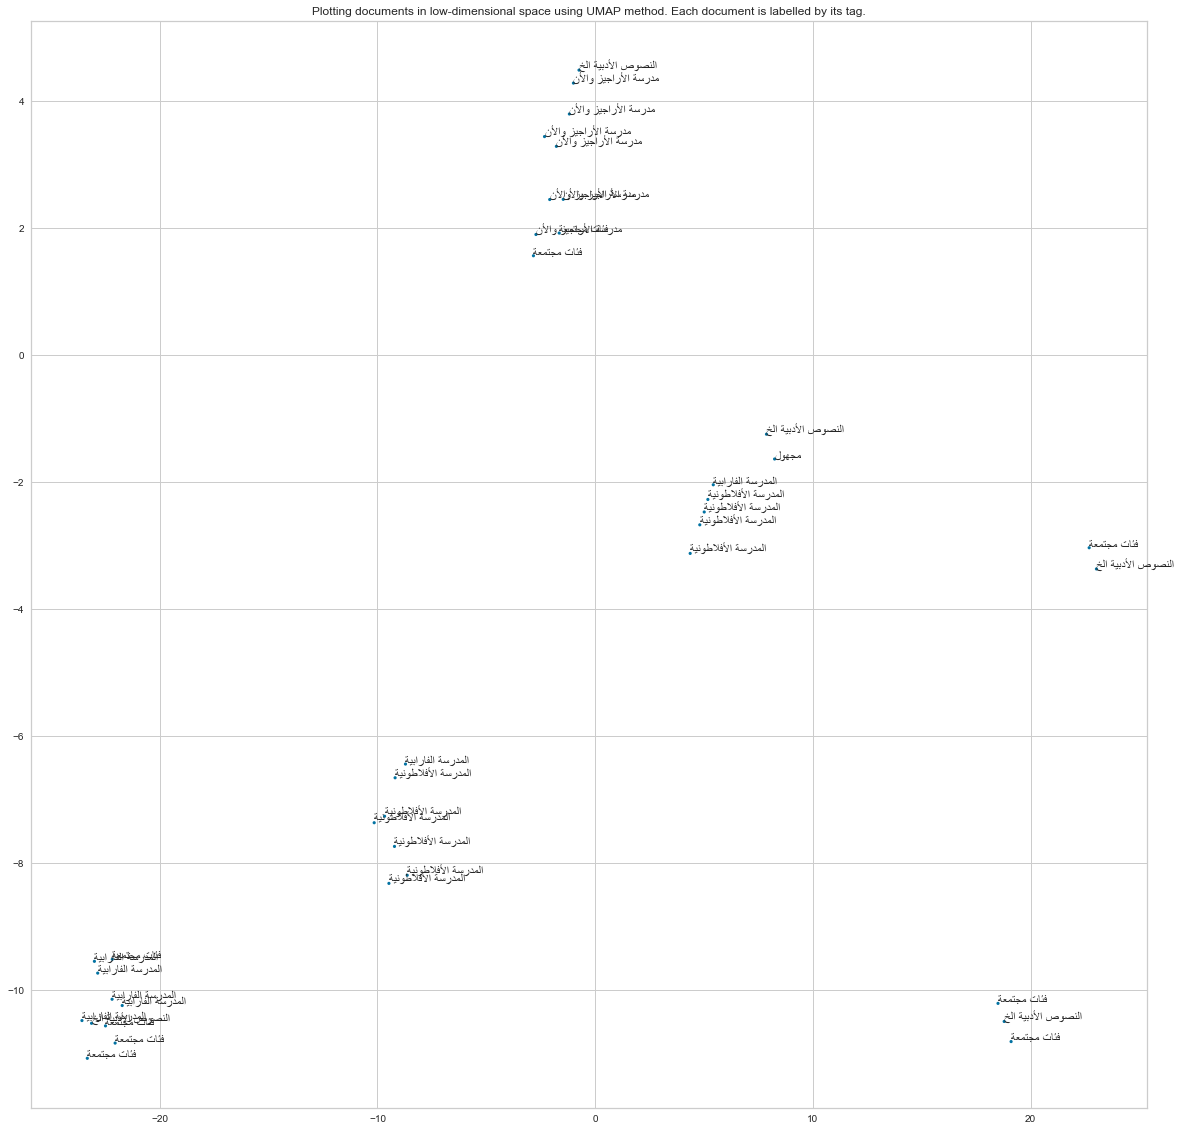

In [58]:
plt.figure(figsize=(20,20))
plt.scatter(doc_umap_embedding[:, 0], doc_umap_embedding[:, 1], edgecolor='none',s = 10)
for i in range(doc_umap_embedding.shape[0]):
    plt.text(doc_umap_embedding[i, 0], doc_umap_embedding[i, 1],labels2[i])
plt.title(f'Plotting documents in low-dimensional space using UMAP method. Each document is labelled by its tag.')
plt.savefig('../results/documents_umap_tag.png')
plt.show()

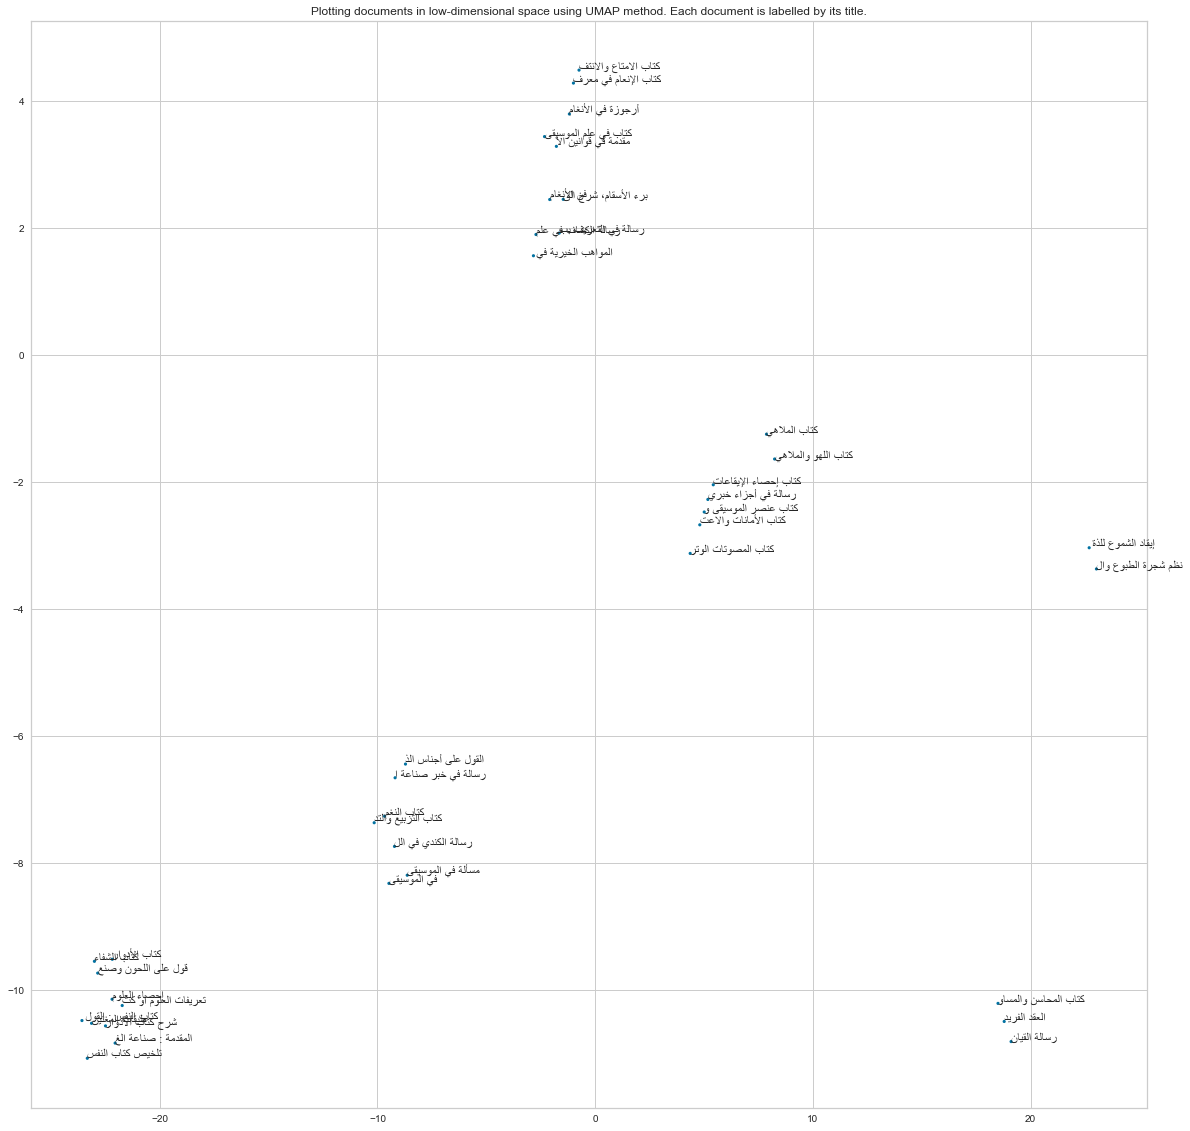

In [59]:
plt.figure(figsize=(20,20))
plt.scatter(doc_umap_embedding[:, 0], doc_umap_embedding[:, 1], edgecolor='none',s = 10)
for i in range(doc_umap_embedding.shape[0]):
    plt.text(doc_umap_embedding[i, 0], doc_umap_embedding[i, 1],labels1[i])
plt.title(f'Plotting documents in low-dimensional space using UMAP method. Each document is labelled by its title.')
plt.savefig('../results/documents_umap_title.png')
plt.show()

****

## Document Clustering

Using results of linear dim. reduction only (without non-linear), i.e. directly using `X_lsa` variable.

In [70]:
## Important hyperparameters   TO DO: tune these values ...

K = 6
N = 30

In [71]:
X_lsa.shape

(39, 30)

In [72]:
X_lsa_sub = X_lsa[:,0:N]

### Hierarchical clustering method
(using ward linkage)

References: 

- https://nbviewer.jupyter.org/github/OxanaSachenkova/hclust-python/blob/master/hclust.ipynb
- https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318

In [73]:
# setting distance_threshold=0 ensures we compute the full tree.

hierarch_model1 = AgglomerativeClustering(distance_threshold=None, n_clusters=K, affinity='euclidean', linkage='ward')
hierarch_model1.fit(X_lsa_sub)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6)

In [74]:
print("Distribution of number of documents per cluster:")
pd.Series(hierarch_model1.labels_).value_counts()

Distribution of number of documents per cluster:


0    16
1     7
3     6
2     5
5     3
4     2
dtype: int64

In [75]:
for i in range(K):
    idx = hierarch_model1.labels_==i
    u = doc_data_df.loc[idx,['title_arabic','primary_tag']]
    u.title_arabic = u.title_arabic.map(lambda x: x[:30])
    u.primary_tag = u.primary_tag.map(lambda x: x[:40])
    u.sort_values(by='primary_tag',ascending=False,inplace=True)
    # because of the right-to-left problem ...
    u.columns = ['primary_tag','title_arabic']
    print(f"cluster#{i}: {idx.sum()} documents.")
    print(tabulate(u,headers='keys',stralign='left',colalign=None,tablefmt="psql"))
    print()

cluster#0: 16 documents.
+----+--------------------------------+------------------------------+
|    | primary_tag                    | title_arabic                 |
|----+--------------------------------+------------------------------|
|  4 | كتاب الأدوار                   | فئات مجتمعة                  |
| 23 | شرح كتاب الأدوار               | فئات مجتمعة                  |
| 33 | المقدّمة : صناعة الغناء         | فئات مجتمعة                  |
| 35 | تلخيص كتاب النّفس               | فئات مجتمعة                  |
| 25 | طبقات المغنّين                  | النّصوص الأدبيّة الخبريّة       |
|  5 | قول على اللّحون وصنعة المعازف   | المدرسة الفارابيّة            |
|  7 | كتاب الشّفاء                    | المدرسة الفارابيّة            |
| 10 | كتاب إحصاء الإيقاعات           | المدرسة الفارابيّة            |
| 11 | القول على أجناس الّذي بالأربعة  | المدرسة الفارابيّة            |
| 18 | كتاب النّفس : القول في السّمع    | المدرسة الفارابيّة            |
| 34 | إحصاء العلوم                 

In [89]:
i=0
idx = hierarch_model1.labels_==i
u = doc_data_df.loc[idx,['title_arabic','primary_tag']]
u.title_arabic = u.title_arabic.map(lambda x: x[:30])
u.primary_tag = u.primary_tag.map(lambda x: x[:40])
u.sort_values(by='primary_tag',ascending=False,inplace=True)
print(f"cluster#{i}: {idx.sum()} documents.")
u

cluster#0: 16 documents.


,title_arabic,primary_tag
4,كتاب الأدوار,فئات مجتمعة
23,شرح كتاب الأدوار,فئات مجتمعة
33,المقدّمة : صناعة الغناء,فئات مجتمعة
35,تلخيص كتاب النّفس,فئات مجتمعة
25,طبقات المغنّين,النّصوص الأدبيّة الخبريّة
5,قول على اللّحون وصنعة المعازف,المدرسة الفارابيّة
7,كتاب الشّفاء,المدرسة الفارابيّة
10,كتاب إحصاء الإيقاعات,المدرسة الفارابيّة
11,القول على أجناس الّذي بالأربعة,المدرسة الفارابيّة
18,كتاب النّفس : القول في السّمع,المدرسة الفارابيّة


#### Visualize clusters using dendogram

In [77]:
#?linkage

In [78]:
# compute the linkage matrix

X_link_ward = linkage(X_lsa_sub, method='ward')

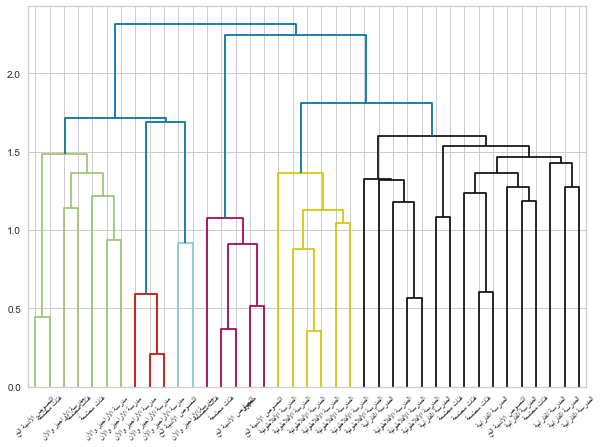

In [79]:
plt.figure(figsize=(10, 7))

dendrogram(X_link_ward,
            orientation='top',
            labels=labels2,
            distance_sort='descending',
            show_leaf_counts=True)
#plt.xlabel('Document tag')
#plt.ylabel('Distance')
#plt.suptitle('Hierarchical clustering with ward linkage', fontweight='bold', fontsize=14)
plt.show()

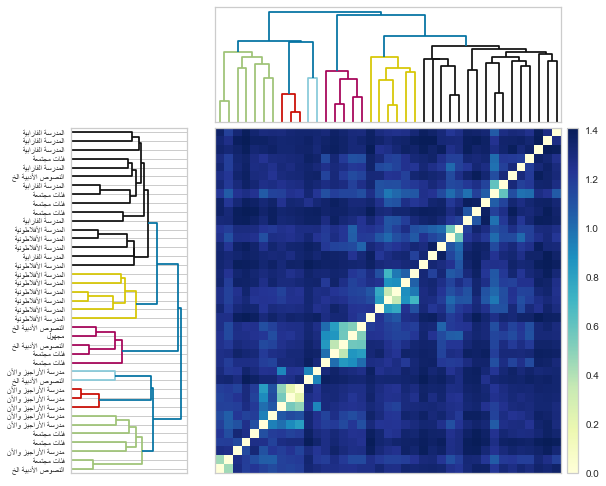

In [91]:
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = X_link_ward
Z1 = dendrogram(Y, orientation='right',labels=labels2) # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(pdist(X_lsa_sub))
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)

plt.savefig('../results/dendogram_tags.png')

plt.show()

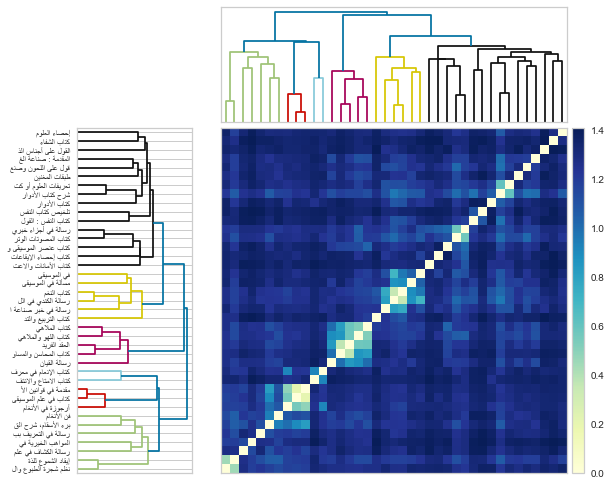

In [92]:
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = X_link_ward
Z1 = dendrogram(Y, orientation='right',labels=labels1) # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(pdist(X_lsa_sub))
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)

plt.savefig('../results/dendogram_titles.png')

plt.show()

### K-Means clustering method

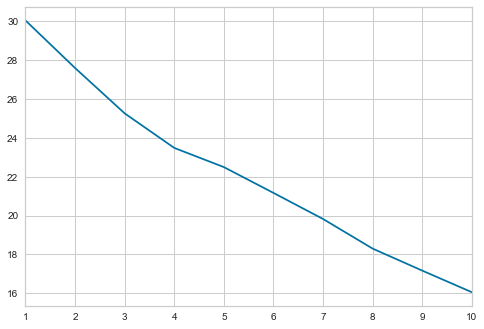

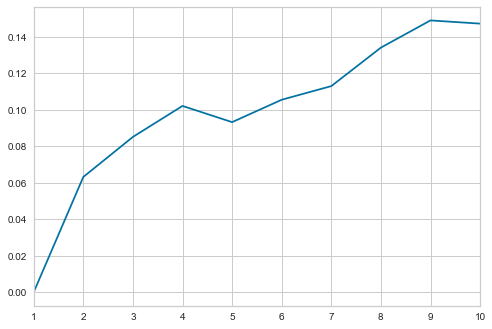

In [82]:
K_values = list(range(1,11))
SSD_array = np.zeros((len(K_values)))
silh_scores_array = np.zeros((len(K_values)))

for j,k in enumerate(K_values):
    km_ = KMeans(n_clusters=k, random_state=102)
    km_.fit(X_lsa_sub)
    SSD_array[j] = km_.inertia_
    if k>1:
        silh_scores_array[j] = silhouette_score(X_lsa_sub, km_.labels_, metric='euclidean')

pd.Series(SSD_array,index=K_values).plot()
plt.show()

pd.Series(silh_scores_array,index=K_values).plot()
plt.show()

In [83]:
km1 = KMeans(n_clusters=K, random_state=102)
km1.fit(X_lsa_sub)
SSD = km1.inertia_
silh_score = silhouette_score(X_lsa_sub, km1.labels_, metric='euclidean')
SSD,silh_score

(21.165367957456773, 0.1054453083012822)

In [84]:
pd.Series(km1.labels_).value_counts()

3    15
5     6
1     6
4     5
2     5
0     2
dtype: int64

In [85]:
for i in range(K):
    idx = km1.labels_==i
    u = doc_data_df.loc[idx,['title_arabic','primary_tag']]
    u.title_arabic = u.title_arabic.map(lambda x: x[:30])
    u.primary_tag = u.primary_tag.map(lambda x: x[:40])
    u.sort_values(by='primary_tag',ascending=False,inplace=True)
    # because of the right-to-left problem ...
    u.columns = ['primary_tag','title_arabic']
    print(f"cluster#{i}: {idx.sum()} documents.")
    print(tabulate(u,headers='keys',stralign='left',colalign=None,tablefmt="psql"))
    print()

cluster#0: 2 documents.
+----+--------------------------------+------------------------+
|    | primary_tag                    | title_arabic           |
|----+--------------------------------+------------------------|
|  4 | كتاب الأدوار                   | فئات مجتمعة            |
| 13 | كتاب الامتاع والانتفاع في مسأل | النّصوص الأدبيّة الخبريّة |
+----+--------------------------------+------------------------+

cluster#1: 6 documents.
+----+-------------------------------+-------------------------+
|    | primary_tag                   | title_arabic            |
|----+-------------------------------+-------------------------|
| 19 | كتاب الإنعام في معرفة الأنغام | مدرسة الأراجيز والأنغام |
| 30 | فنّ الأنغام                    | مدرسة الأراجيز والأنغام |
| 17 | رسالة في التّعريف ببعض كلمات ف | فئات مجتمعة             |
| 36 | إيقاد الشّموع للذّة المسموع بن  | فئات مجتمعة             |
| 38 | المواهب الخيريّة في كيفيّة عمل  | فئات مجتمعة             |
| 16 | نظم شجرة الطّبوع والطّبائ

### Compare results of different clustering methods

In [86]:
for x in [hierarch_model1.labels_,km1.labels_]:
    print(pd.Series(x).value_counts())

0    16
1     7
3     6
2     5
5     3
4     2
dtype: int64
3    15
5     6
1     6
4     5
2     5
0     2
dtype: int64


In [87]:
len(Counter(zip(hierarch_model1.labels_,km1.labels_)))

11

In [88]:
Counter(zip(hierarch_model1.labels_,km1.labels_))

Counter({(3, 3): 5,
         (0, 5): 5,
         (0, 0): 1,
         (0, 3): 10,
         (1, 2): 2,
         (4, 0): 1,
         (1, 1): 5,
         (4, 1): 1,
         (2, 4): 5,
         (5, 2): 3,
         (3, 5): 1})

### Remarks and conclusions

- better tuning of hyperparameter values K and N (currently N=5 and N=7)
- the value of K was determined based on visual plot of documents

****

## Keyword extraction

The goal is to determine the **most important words**:

1. for the entire corpus
2. for each category of documents (tags)

### Unsupervised keyword extraction

Extract important keywords & key phrases for the entire corpus, independently of document tags.

In [ ]:
import yake

In [ ]:
corpus_str = '\n'.join([' '.join(doc_tokens) for doc_tokens in corpus_words])
type(corpus_str),len(corpus_str)

In [ ]:
## hyperparameters of the method
language = "ar"
max_ngram_size = 1
numOfKeywords = 20

In [ ]:
## initialize method
kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, top=numOfKeywords, features=None)

## execute method on our corpus
yake_keywords = kw_extractor.extract_keywords(corpus_str)
type(yake_keywords),type(yake_keywords[0])

In [ ]:
df = pd.DataFrame(yake_keywords, columns=['word','weight']).set_index('word')

In [ ]:
df

In [ ]:
df.index = df.index.map(lambda x: get_display(arabic_reshaper.reshape(x)))
df.plot.barh()

In [ ]:
## hyperparameters of the method
language = "ar"
max_ngram_size = 2
numOfKeywords = 20

In [ ]:
## initialize method
kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, top=numOfKeywords, features=None)

## execute method on our corpus
yake_keywords2 = kw_extractor.extract_keywords(corpus_str)
type(yake_keywords2),type(yake_keywords2[0])

df2 = pd.DataFrame(yake_keywords2, columns=['word','weight']).set_index('word')
df2

****

### Supervised keyword extraction

- Recall that documents of our corpus are assigned to one or more tags (by our musicology expert). A **tag** specifies a class or category of documents.

- We will determine **which vocabulary terms are most associated with each tag**, i.e. find words that tend to occur more frequently in documents tagged by that tag than documents that are not. Such words basically characterize or summarize the content of this class of documents.  We will do this using the statistical notion of **mutual information**.

- To simplify analysis, we only consider a single tag for each document -- the most frequently occurring tag.


THIS SECTION IS NOT YET FINISHED ...

#### using tfidf vector representation

In [ ]:
#?chi2
#Usage: chi2(X,y)
#Computes chi-squared statistics of each feature in X with respect to the categorical variable in y
#X must contain only non-negative features, such as booleans or frequencies relative to the classes.
#(e.g., term counts in document classification).

In [ ]:
#?mutual_info_classif
#Usage: mutual_info_classif(X,y,discrete_features='auto',n_neighbors=3,copy=True,random_state=None)
#Estimates mutual information for a discrete target variable y.
#Mutual information (MI) between two random variables is a non-negative
#value, which measures the dependency between the variables. It is equal
#to zero if and only if two random variables are independent, and higher
#values mean higher dependency.
#This function relies on nonparametric methods based on entropy estimation
#from k-nearest neighbors distances.

In [ ]:
special_words = [x for x in bow_vocab if x.find('نغم')!=-1]
special_words

In [ ]:
special_words = [x for x in bow_vocab if (x.find('نغم')!=-1 and ' ' not in x)]
special_words

In [ ]:
list(map(lambda x: (x.shape,x.data.min(),x.data.max()),[count_bow_matrix,tfidf_bow_matrix]))

In [ ]:
def helper_func(tag, mat, vocab, N=20):
    # which documents belong to this tag
    tag_idx = doc_data_df.tags_agg.map(lambda x: tag in x)
    # mutual information between each vocab term and this tag
    ch,pv = chi2(mat,tag_idx)
    #mi = mutual_info_classif(mat,tag_idx)
    # document frequency of each vocab term in documents of this tag
    nb_docs_per_term = (mat.A[tag_idx,:]>0).sum(axis=0).ravel()
    assert len(nb_docs_per_term)==len(ch)
    # put together in a data frame for visualization purposes
    df = pd.DataFrame({'chi2':ch, 'doc_freq':nb_docs_per_term},index=vocab)
    df['raw_words'] = df.index.map(lambda word: debug_reverse_word_stem_dict[word])
    #sns.pairplot(df)
    #plt.show()
    #print(df.corr())
    print(f"Tag: {tag}")
    print(f"Top {N} most important words")
    df.sort_values(by='chi2',ascending=False,inplace=True)
    print(df.head(N))
    #print(tabulate(df,headers='keys',stralign='left',colalign=None))
    print('Special words only:')
    print(df.loc[special_words].sort_values(by='chi2',ascending=False))
    print()
    return df

In [ ]:
for tag in frequent_tags_list:
    _ = helper_func(tag, count_bow_matrix, bow_vocab)

In [ ]:
for tag in frequent_tags_list:
    _ = helper_func(tag, tfidf_bow_matrix, bow_vocab)

**Remarks**

- chi2 is a much better measure of association than mi 
- mi seems to follow document frequency

#### using low-dimensional representation (LSA)

- determine important words based on component weights
- Visualize words in low-dimensional space
- **TO DO**: calculate association (mutual information) between words and tags

In [ ]:
type(svd.components_)

In [ ]:
# TO DO: add word frequency and calculate correlation ...

u2=pd.DataFrame({'min_comp_weight':abs(svd.components_).min(axis=0),'max_comp_weight':abs(svd.components_).max(axis=0)}, index=bow_vocab)
u2.describe(percentiles=[.25, .5, .75,0.9,0.95,0.99])

In [ ]:
u2.plot.scatter(x='min_comp_weight',y='max_comp_weight')

In [ ]:
u2.sort_values(by='max_comp_weight',ascending=False).head(20)

In [ ]:
important_words_idx = u2.max_comp_weight>0.15
important_words_idx.sum(),important_words_idx.mean()

In [ ]:
X_ = svd.components_.T
X_.shape

In [ ]:
for n in [20,50,100,150,200,300]:
    %time embedding = umap.UMAP(n_neighbors=n, min_dist=0.5, random_state=12).fit_transform(X_)

    plt.figure(figsize=(7,5))
    plt.scatter(embedding[:, 0], embedding[:, 1], edgecolor='none',s = 10)
    plt.title(f'UMAP with {n} neighbors')
    plt.show()

In [ ]:
%time embedding = umap.UMAP(n_neighbors=300, min_dist=0.5, random_state=12).fit_transform(X_)

plt.figure(figsize=(20,20))
plt.scatter(embedding[:, 0], embedding[:, 1], edgecolor='none',s = 10)
plt.scatter(embedding[important_words_idx, 0], embedding[important_words_idx, 1], edgecolor='none',s = 10,c='red')
for i in pd.np.where(important_words_idx)[0]:
    plt.text(embedding[i, 0], embedding[i, 1],get_display(arabic_reshaper.reshape(bow_vocab[i])))
plt.title(f'UMAP with 300 neighbors')
plt.savefig('../results/words_umap.png')
plt.show()

****

## EXTRA STUFF

### Clustering using results of non-linear dim. reduction

i.e. using `doc_umap_embedding` variable.

#### Hierarchical agglomerative method 
(with ward linkage)

In [ ]:
hierarch_model2 = AgglomerativeClustering(distance_threshold=None, n_clusters=K, affinity='euclidean', linkage='ward')
hierarch_model2.fit(doc_umap_embedding)

print("Distribution of number of documents per cluster:")
pd.Series(hierarch_model2.labels_).value_counts()

In [ ]:
for i in range(K):
    idx = hierarch_model2.labels_==i
    u = doc_data_df.loc[idx,['title_arabic','primary_tag']]
    u.title_arabic = u.title_arabic.map(lambda x: x[:30])
    u.primary_tag = u.primary_tag.map(lambda x: x[:40])
    u.sort_values(by='primary_tag',ascending=False,inplace=True)
    # because of the right-to-left problem ...
    u.columns = ['primary_tag','title_arabic']
    print(f"cluster#{i}: {idx.sum()} documents.")
    print(tabulate(u,headers='keys',stralign='left',colalign=None,tablefmt="psql"))
    print()

#### Visualize clusters using dendogram

In [ ]:
# computing the linkage matrix

embedding_link_ward = linkage(doc_umap_embedding, method='ward')

In [ ]:
plt.figure(figsize=(10, 7))

dendrogram(embedding_link_ward,
            orientation='top',
            labels=labels2,
            distance_sort='descending',
            show_leaf_counts=True)
#plt.xlabel('Document tag')
#plt.ylabel('Distance')
#plt.suptitle('Hierarchical clustering with ward linkage', fontweight='bold', fontsize=14)
plt.show()

In [ ]:
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = embedding_link_ward
Z1 = dendrogram(Y, orientation='right',labels=labels2) # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(pdist(doc_umap_embedding))
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

In [ ]:
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = embedding_link_ward
Z1 = dendrogram(Y, orientation='right',labels=labels1) # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(pdist(doc_umap_embedding))
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

#### kmeans clustering

In [ ]:
doc_umap_embedding.shape

In [ ]:
K_values = list(range(1,11))
SSD_array = np.zeros((len(K_values)))
silh_scores_array = np.zeros((len(K_values)))

X_ = doc_umap_embedding
for j,k in enumerate(K_values):
    km_ = KMeans(n_clusters=k, random_state=102)
    km_.fit(X_)
    SSD_array[j] = km_.inertia_
    if k>1:
        silh_scores_array[j] = silhouette_score(X_, km_.labels_, metric='euclidean')

pd.Series(SSD_array,index=K_values).plot()
plt.show()

pd.Series(silh_scores_array,index=K_values).plot()
plt.show()

In [ ]:
km2 = KMeans(n_clusters=K, random_state=102)
km2.fit(doc_umap_embedding)
SSD = km2.inertia_
silh_score = silhouette_score(doc_umap_embedding, km2.labels_, metric='euclidean')
SSD,silh_score

In [ ]:
print("Distribution of number of documents per cluster:")
pd.Series(km2.labels_).value_counts()

### Plot dendogram with single linkage

In [ ]:
X_link_single = linkage(X_lsa_sub, method='single')

In [ ]:
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = X_link_single
Z1 = dendrogram(Y, orientation='right',labels=labels2) # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(pdist(X_lsa_sub))
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)

In [ ]:
dendrogram(X_link_single,labels=labels2)
plt.xlabel('Document tag')
plt.ylabel('Distance')
plt.suptitle('Hierarchical clustering with single linkage', fontweight='bold', fontsize=14)

****

### Visualize similarity matrix of documents

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
X_lsa.shape

In [ ]:
S = cosine_similarity(X_lsa)
S.shape

In [ ]:
S[0:5,0:5]

In [ ]:
## Re-arrange similarity matrix as a block matrix by tag


In [ ]:
pd.DataFrame(doc_data_df.primary_tag.value_counts())

In [ ]:
# plot as a heatmap
# sort documents by tag so that documents of same tag are together

df = pd.DataFrame(S, index=doc_data_df.primary_tag, columns=doc_data_df.primary_tag)
idx = doc_data_df.primary_tag.sort_values(ascending=False).index
df2 = df.iloc[idx,idx].copy()
df2.index = df2.index.map(lambda x: get_display(arabic_reshaper.reshape(x[0:20])))
df2.columns = df2.index
plt.figure(figsize=(10,8))
plt.title('', y=1.05, size=12)
sns.heatmap(df2, linewidths=0.1, square=True, linecolor='white', annot=False, cmap=plt.cm.RdBu)
plt.xlabel('document tag')
plt.ylabel('document tag')

*****

SCRATCH PAD (to test tabulate() function)

In [ ]:
#?tabulate

In [ ]:
i=1
idx = hierarch_model1.labels_==i
u = doc_data_df.loc[idx,['title_arabic','primary_tag']]
u.title_arabic = u.title_arabic.map(lambda x: x[:30])
u.primary_tag = u.primary_tag.map(lambda x: x[:40])
u.sort_values(by='primary_tag',ascending=False,inplace=True)
# because of the right-to-left problem ...
u.columns = ['primary_tag','title_arabic']

print(tabulate(u,headers='keys',stralign='left',colalign=None,tablefmt='psql'))

In [ ]:
print(tabulate(u,headers='keys',stralign='left',colalign=None,tablefmt="fancy_grid"))

In [ ]:
i=0
idx = hierarch_model2.labels_==i
u = doc_data_df.loc[idx,['title_arabic','primary_tag']]
u.title_arabic = u.title_arabic.map(lambda x: x[:30])
u.primary_tag = u.primary_tag.map(lambda x: x[:40])
u.sort_values(by='primary_tag',ascending=False,inplace=True)
u

In [ ]:
i=1
idx = hierarch_model2.labels_==i
u = doc_data_df.loc[idx,['title_arabic','primary_tag']]
u.title_arabic = u.title_arabic.map(lambda x: x[:30])
u.primary_tag = u.primary_tag.map(lambda x: x[:40])
u.sort_values(by='primary_tag',ascending=False,inplace=True)
u

In [ ]:
i=2
idx = hierarch_model2.labels_==i
u = doc_data_df.loc[idx,['title_arabic','primary_tag']]
u.title_arabic = u.title_arabic.map(lambda x: x[:30])
u.primary_tag = u.primary_tag.map(lambda x: x[:40])
u.sort_values(by='primary_tag',ascending=False,inplace=True)
u

END SCRATCH PAD